In [1]:
import ABCHelpers
from ABCHelpers import *

In [2]:
modelName = 'Young_Shrub'

In [3]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
metrics = {
    'default_w':       (0.2, 1.5),
    'default_decay':   (0.4, 1.0),
    'default_slash':   (0, 90),
    'default_slashr':  (0, 50),
    'default_plus':    (0, 180),
    'default_plusr':   (0, 50),
}

In [5]:
prior = Distribution(default_slash   =RV("uniform", 0, 90), 
                     default_slashr =RV("uniform", 0, 50),
                     default_plus    =RV("uniform", 0, 180),
                     default_plusr  =RV("uniform", 0, 50),
                     default_decay   =RV("uniform", 0.4, 1.0),
                     default_w       =RV("uniform", 0.2, 1.5),
                    )

In [6]:
abc = ABCSMC(model, prior, distance)

In [7]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [8]:
target = model({})

In [9]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=42, start_time=2019-02-25 23:48:21.115425, end_time=None)>
INFO:Epsilon:initial epsilon is 23.99909025997944


42

In [10]:
history = abc.run(minimum_epsilon=1.0, max_nr_populations=15)

INFO:ABC:t:0 eps:23.99909025997944
INFO:ABC:t:1 eps:18.221855015388112
INFO:ABC:t:2 eps:14.223576025268082
Process Process-32:
Process Process-25:
Process Process-27:
Process Process-26:
Process Process-28:
Process Process-29:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-30:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/t/anaconda3/lib/python3.7/multiprocessi

  File "/home/t/Documents/diss/CompiledApproach/Probability_Based_App/App/Models/Interpret.py", line 82, in getPoints
    points.append(turtle.View(includeAngles)+(s.Length(),))
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/smc.py", line 644, in _evaluate_proposal
    x_0)
  File "/home/t/Documents/diss/CompiledApproach/Probability_Based_App/App/Models/Turtle.py", line 12, in __init__
    self.heading = rotations.do_rot(self.heading, 2, 90)
  File "/home/t/Documents/diss/CompiledApproach/Probability_Based_App/App/Models/ABCHelpers.py", line 114, in model
    treeData = Interpret.getPoints(modelName, paramDict, includeAngles=True)
  File "/home/t/Documents/diss/CompiledApproach/Probability_Based_App/App/Models/ABCHelpers.py", line 114, in model
    treeData = Interpret.getPoints(modelName, paramDict, includeAngles=True)
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/smc.py", line 553, in simulate_one
    transitions)
  File "/home/t/Documents/diss/CompiledAppr

KeyboardInterrupt: 

NameError: name 'history' is not defined

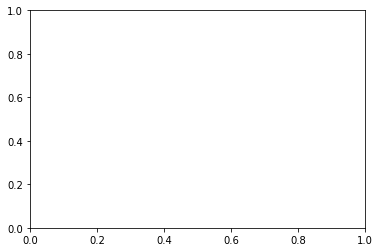

In [11]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(0, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();